In [1]:
#pip install bing-image-downloader

In [2]:
from bing_image_downloader import downloader

In [3]:
downloader.download('eczema',limit=3, adult_filter_off=False)

[%] Downloading Images to /Users/tugrul/Desktop/Day9/dataset


[!!]Indexing page: 1

[%] Indexed 3 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/b2/62/82/b26282fd10f23cccdd4181837234bbef.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://images.hdqwalls.com/download/lamborghini-on-city-road-rl-1440x2560.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEj-pr6C4OkAXN_oyTn11ZD-ag2wxraK-QgLDa_vE_hQCn0-kzbCJEPTRuZbeVncI30PEBcNMzk6s12wKJ4dJU7kLAWgggtaTKCPRad7TC_JgDU3-QQAgqwQVN44E57Tqgm5PakC5VYUx1oTLAOp_dWOYUTcB6SLfvY6VHKepkP85DiKgaKuBM5wgyAxq0GW/s1600/06-Hair-covering-Charcoal-Portraits-Jim-Bentley-www-designstack-co.jpg
[%] File Downloaded !



[%] Done. Downloaded 3 images.


# Computer Vision with Deep Learning

In [9]:
import tensorflow as tf

In [15]:
mnist = tf.keras.datasets.mnist # El yazilarini tanır

In [17]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [19]:
train_images.shape

(60000, 28, 28)

In [21]:
import matplotlib.pyplot as plt

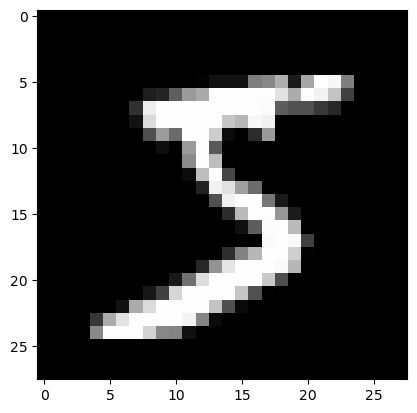

In [23]:
plt.imshow(train_images[0],cmap='gray')

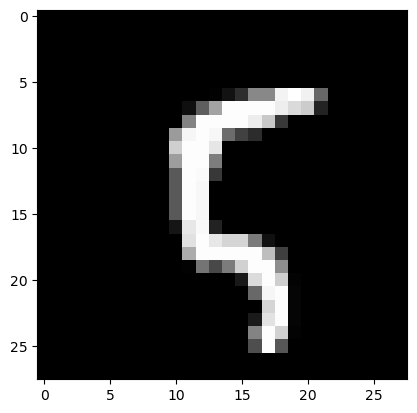

In [25]:
plt.imshow(train_images[100],cmap='gray')

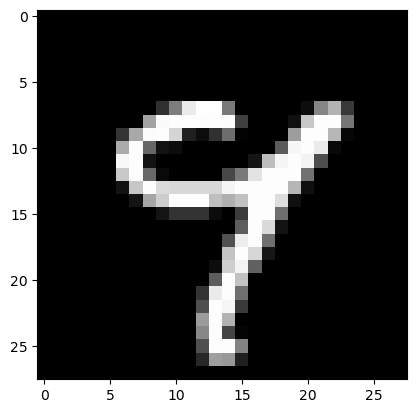

In [27]:
plt.imshow(train_images[54],cmap='gray')

In [29]:
train_labels[54]

9

In [31]:
train_labels[100]

5

In [33]:
test_images.shape

(10000, 28, 28)

In [37]:
#normalize data

In [39]:
train_images = train_images/255.0
test_images = test_images/255.0

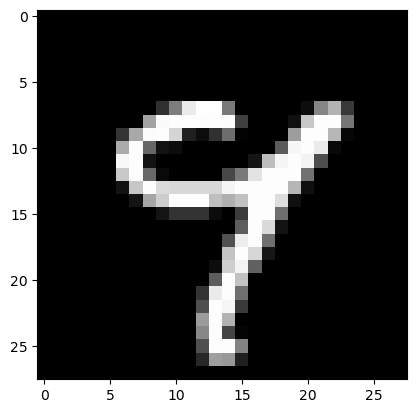

In [41]:
plt.imshow(train_images[54],cmap='gray')

In [43]:
# Convolutional Neural Networks CNNs - Image Classification

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten

In [69]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28)))
model.add(Reshape(target_shape=(28,28,1)))
model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10))
model.compile(optimizer ='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [75]:
model.fit(train_images,train_labels,validation_split=.1,epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8509 - loss: 0.5284 - val_accuracy: 0.9653 - val_loss: 0.1336
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9610 - loss: 0.1382 - val_accuracy: 0.9767 - val_loss: 0.0915
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9722 - loss: 0.0988 - val_accuracy: 0.9778 - val_loss: 0.0828
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9785 - loss: 0.0759 - val_accuracy: 0.9818 - val_loss: 0.0708
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9800 - loss: 0.0672 - val_accuracy: 0.9832 - val_loss: 0.0608
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9831 - loss: 0.0584 - val_accuracy: 0.9830 - val_loss: 0.0644
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9846 - loss: 0.0511 - val_accuracy: 0.9827 - val_loss: 0.0638
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9863 - loss: 0.0448 - 

In [77]:
loss, accuracy=model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.9764 - loss: 0.0758


In [79]:
accuracy

0.9805999994277954

In [81]:
model.save('benimmodel.h5')

In [83]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28)))
model.add(Reshape(target_shape=(28,28,1)))
model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(60))
model.add(Dense(10))
model.compile(optimizer ='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [89]:
# deep learning basarı oranını arttır
# 1- layers sayisini arttır
# 2- neuron sayisini arttir
# 3- Dropout overfittingi engeller daha iyi ogrenmeyi saglar